In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [2]:
train_csv = './datasets/given/train.csv'
test_csv = './datasets/given/test.csv'

train_ames = pd.read_csv(train_csv)
test_ames = pd.read_csv(test_csv)

In [3]:
print test_ames.shape
print train_ames.shape

(879, 79)
(2051, 81)


In [4]:
train_ames.head()

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,528120170,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,300000
1,535179060,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000
2,528138030,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
3,526355170,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
4,909452050,80,RL,NaN,13607,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,1500,4,2009,WD,Normal,208000


In [5]:
train_ames.columns

Index([u'PID', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'X1stFlrSF',
       u'X2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinis

In [6]:
# My target slice that out first
y_train = train_ames['SalePrice']

In [7]:
print zip(train_ames.columns, train_ames.isnull().sum())

[('PID', 0), ('MSSubClass', 0), ('MSZoning', 0), ('LotFrontage', 346), ('LotArea', 0), ('Street', 0), ('Alley', 1918), ('LotShape', 0), ('LandContour', 0), ('Utilities', 0), ('LotConfig', 0), ('LandSlope', 0), ('Neighborhood', 0), ('Condition1', 0), ('Condition2', 0), ('BldgType', 0), ('HouseStyle', 0), ('OverallQual', 0), ('OverallCond', 0), ('YearBuilt', 0), ('YearRemodAdd', 0), ('RoofStyle', 0), ('RoofMatl', 0), ('Exterior1st', 0), ('Exterior2nd', 0), ('MasVnrType', 19), ('MasVnrArea', 19), ('ExterQual', 0), ('ExterCond', 0), ('Foundation', 0), ('BsmtQual', 59), ('BsmtCond', 59), ('BsmtExposure', 60), ('BsmtFinType1', 59), ('BsmtFinSF1', 1), ('BsmtFinType2', 60), ('BsmtFinSF2', 1), ('BsmtUnfSF', 1), ('TotalBsmtSF', 1), ('Heating', 0), ('HeatingQC', 0), ('CentralAir', 0), ('Electrical', 1), ('X1stFlrSF', 0), ('X2ndFlrSF', 0), ('LowQualFinSF', 0), ('GrLivArea', 0), ('BsmtFullBath', 2), ('BsmtHalfBath', 2), ('FullBath', 0), ('HalfBath', 0), ('BedroomAbvGr', 0), ('KitchenAbvGr', 0), ('K

In [8]:
print train_ames['MSSubClass'].unique() #There is no 150 in the test set?
print test_ames['MSSubClass'].unique()

[ 20  60  80 160 120  85 190  30  50  70  45  75  90 180  40 150]
[ 60 120  20 160  80  30  90  50  85  45  70  40 180 190  75]


In [9]:
train = pd.get_dummies(train_ames['MSSubClass']).drop(columns=150)
test = pd.get_dummies(test_ames['MSSubClass'])

In [10]:
# These are the columns I will take wholesale as features
train[['LotArea', 'GrLivArea', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold', 'MiscVal', 'OverallQual', 'YearBuilt']] = train_ames[['LotArea', 'GrLivArea', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold', 'MiscVal', 'OverallQual', 'YearBuilt']]
test[['LotArea', 'GrLivArea', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold', 'MiscVal', 'OverallQual', 'YearBuilt']] = test_ames[['LotArea', 'GrLivArea', 'TotRmsAbvGrd', 'FullBath', 'HalfBath', 'Fireplaces', 'PoolArea', 'MoSold', 'YrSold', 'MiscVal', 'OverallQual', 'YearBuilt']]

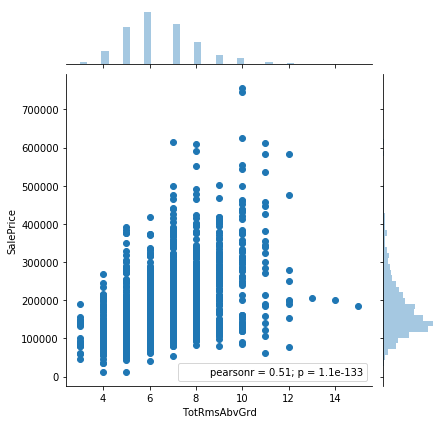

In [11]:
sns.jointplot(train_ames['TotRmsAbvGrd'], train_ames['SalePrice'])

In [12]:
print train_ames.MSZoning.unique() # 2 zones not in test set ['A (agr)', 'I (all)']
print test_ames.MSZoning.unique()

['RL' 'RM' 'FV' 'C (all)' 'RH' 'A (agr)' 'I (all)']
['RL' 'FV' 'RM' 'RH' 'C (all)']


In [13]:
train_zone = pd.get_dummies(train_ames['MSZoning']).drop(columns=['A (agr)', 'I (all)'])
train = train.merge(train_zone, right_index=True, left_index=True)
test = test.merge(pd.get_dummies(test_ames['MSZoning']), right_index=True, left_index=True)

In [14]:
# Not going to include lot frontage because it will be too corralated with the lot shape and lot size

In [15]:
train['Street'] = train_ames.Street.apply(lambda x: 1 if x=='Pave' else 0)
test['Street'] = test_ames.Street.apply(lambda x: 1 if x=='Pave' else 0)

In [16]:
train = train.merge(pd.get_dummies(train_ames['Alley']), left_index=True, right_index=True)
test = test.merge(pd.get_dummies(test_ames['Alley']), left_index=True, right_index=True)

In [17]:
print train_ames['LotShape'].unique()
print test_ames['LotShape'].unique()

['IR1' 'Reg' 'IR2' 'IR3']
['IR1' 'Reg' 'IR2' 'IR3']


In [18]:
train['LotShape']= train_ames['LotShape'].apply(lambda x: 1 if x == 'IR1' else 2 if x =='IR2' else 3 if x == 'IR3' else 0)
test['LotShape']= test_ames['LotShape'].apply(lambda x: 1 if x == 'IR1' else 2 if x =='IR2' else 3 if x == 'IR3' else 0)

In [19]:
print train_ames.Utilities.unique()
print test_ames.Utilities.unique() #Test set has only ['AllPub']

['AllPub' 'NoSeWa' 'NoSewr']
['AllPub']


In [20]:
train['Utilities'] = train_ames['Utilities'].apply(lambda x: 1 if x == 'NoSewr' else 2 if x == 'NoSeWa' else 0)
test['Utilities'] = test_ames['Utilities'].apply(lambda x: 1 if x == 'NoSewr' else 2 if x == 'NoSeWa' else 0)

In [21]:
print train_ames['LotConfig'].unique()
print test_ames['LotConfig'].unique()

['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3']
['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3']


In [22]:
train_lotconfig = pd.get_dummies(train_ames['LotConfig']).drop(columns='Inside')
train = train.merge(train_lotconfig, left_index=True, right_index=True)
test_lotconfig = pd.get_dummies(test_ames['LotConfig']).drop(columns='Inside')
test = test.merge(test_lotconfig, left_index=True, right_index=True)

In [23]:
print train_ames['LandSlope'].unique()
print test_ames['LandSlope'].unique()

['Gtl' 'Mod' 'Sev']
['Gtl' 'Mod' 'Sev']


In [24]:
train['LandSlope'] = train_ames['LandSlope'].apply(lambda x: 1 if x == 'Mod' else 2 if x == 'Sev' else 0)
test['LandSlope'] = test_ames['LandSlope'].apply(lambda x: 1 if x == 'Mod' else 2 if x == 'Sev' else 0)

In [25]:
print len(train_ames['Neighborhood'].unique())
print len(test_ames['Neighborhood'].unique()) 
# two neighborhoods not in train set, ['NoRidge', 'GrnHill'] are on opposit ends of the town, so i'll drop a neighborhood on the outskirts

26
28


In [26]:
train_hood = pd.get_dummies(train_ames['Neighborhood']).drop(columns='NridgHt')
train = train.merge(train_hood, left_index=True, right_index=True)
test_hood = pd.get_dummies(test_ames['Neighborhood']).drop(columns=['NoRidge', 'GrnHill', 'NridgHt'])
test = test.merge(test_hood, left_index=True, right_index=True)

In [27]:
print train_ames['Condition1'].unique()
print test_ames['Condition1'].unique()

['Norm' 'Artery' 'PosA' 'PosN' 'Feedr' 'RRAn' 'RRAe' 'RRNn' 'RRNe']
['Norm' 'PosN' 'Feedr' 'RRAe' 'RRNe' 'Artery' 'PosA' 'RRAn' 'RRNn']


In [28]:
train_cond1 = pd.get_dummies(train_ames['Condition1']).drop(columns='Norm')
train = train.merge(train_cond1, left_index=True, right_index=True)
test_cond1 = pd.get_dummies(test_ames['Condition1']).drop(columns='Norm')
test = test.merge(test_cond1, left_index=True, right_index=True)

In [29]:
print train_ames['Condition2'].unique()
print test_ames['Condition2'].unique()

['Norm' 'Artery' 'RRAn' 'Feedr' 'PosN' 'RRAe' 'PosA']
['Norm' 'Feedr' 'PosA' 'RRNn']


In [30]:
train_cond2 = pd.get_dummies(train_ames['Condition2']).drop(columns=['PosN', 'RRAe', 'Artery'])
train = train.merge(train_cond2, left_index=True, right_index=True)
test_cond2 = pd.get_dummies(test_ames['Condition2'])
test = test.merge(test_cond2, left_index=True, right_index=True)

In [31]:
# skipping house style and building type becasue it is included in the MSSubClass

In [32]:
# Bit of feature engenerring here, better quality is expo important
train['OverallQual**2'] = train_ames['OverallQual'].apply(lambda x: x**2)
test['OverallQual**2'] = test_ames['OverallQual'].apply(lambda x: x**2)

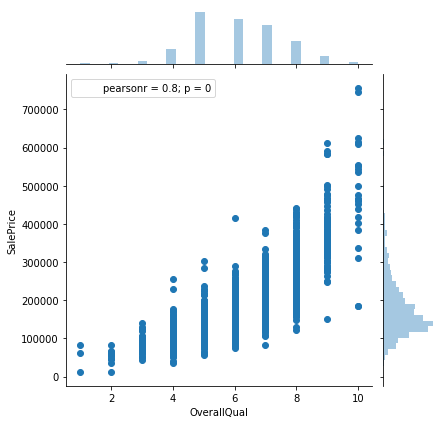

In [33]:
sns.jointplot(train_ames['OverallQual'], train_ames['SalePrice'])

In [34]:
# skipping OverallCond

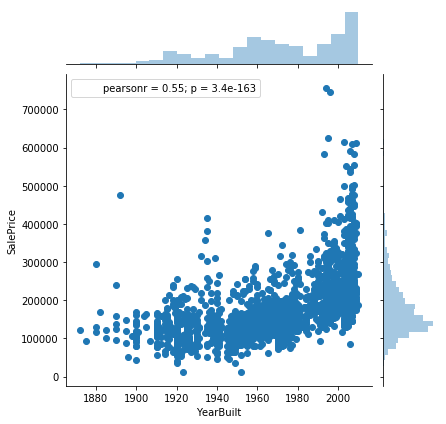

In [35]:
sns.jointplot(train_ames['YearBuilt'], train_ames['SalePrice'])

In [36]:
# Bit of feature engenerring here, better quality is expo important
train['YearBuilt**2'] = train_ames['YearBuilt'].apply(lambda x: x**2)
test['YearBuilt**2'] = test_ames['YearBuilt'].apply(lambda x: x**2)

In [37]:
# Did not find anything interesting with Year remoddled

In [38]:
print train_ames.Exterior1st.unique()
print test_ames.Exterior1st.unique()

['VinylSd' 'HdBoard' 'WdShing' 'Plywood' 'BrkFace' 'CemntBd' 'Wd Sdng'
 'MetalSd' 'AsbShng' 'Stucco' 'CBlock' 'BrkComm' 'Stone' 'AsphShn']
['VinylSd' 'CemntBd' 'HdBoard' 'Plywood' 'MetalSd' 'Wd Sdng' 'WdShing'
 'AsphShn' 'BrkFace' 'Stucco' 'AsbShng' 'BrkComm' 'PreCast' 'ImStucc']


In [39]:
train_ex1 = pd.get_dummies(train_ames['Exterior1st']).drop(columns=['CBlock', 'Stone'])
train = train.merge(train_ex1, left_index=True, right_index=True)
test_ex1 = pd.get_dummies(test_ames['Exterior1st']).drop(columns=['ImStucc', 'PreCast'])
test = test.merge(test_ex1, left_index=True, right_index=True)

In [40]:
# Exterior 2 is too corrilated to Ex 1, so i droped it

In [41]:
print train_ames.ExterQual.unique()
print test_ames.ExterQual.unique()

['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Ex' 'Fa']


In [42]:
# no Poor rating, not as importat as condition

In [43]:
print train_ames.ExterCond.unique()
print test_ames.ExterCond.unique()

['TA' 'Gd' 'Ex' 'Fa' 'Po']
['TA' 'Fa' 'Gd' 'Po' 'Ex']


In [44]:
train['ExterCond'] = train_ames['ExterCond'].apply(lambda x: 4 if x == 'Ex' else 3 if x == 'Gd' else 2 if x == 'TA' else 1 if x =='Fa' else 0)
test['ExterCond'] = test_ames['ExterCond'].apply(lambda x: 4 if x == 'Ex' else 3 if x == 'Gd' else 2 if x == 'TA' else 1 if x =='Fa' else 0)

In [45]:
print train_ames.Foundation.unique()
print test_ames.Foundation.unique()

['PConc' 'CBlock' 'Slab' 'BrkTil' 'Stone' 'Wood']
['PConc' 'CBlock' 'BrkTil' 'Slab' 'Stone' 'Wood']


In [46]:
train_found = pd.get_dummies(train_ames['Foundation']).drop(columns='Wood')
train = train.merge(train_found, left_index=True, right_index=True)
test_found = pd.get_dummies(test_ames['Foundation']).drop(columns='Wood')
test = test.merge(test_found, left_index=True, right_index=True)

In [47]:
print train_ames.BsmtQual.unique()
print test_ames.BsmtQual.unique()

['Ex' 'TA' 'Gd' nan 'Fa' 'Po']
['TA' 'Gd' 'Ex' nan 'Fa']


In [48]:
# The qualitiy category is based on how many inches, so i used that scale insted
train['BsmtQual'] = train_ames['BsmtQual'].apply(lambda x: 110 if x == 'Ex' else 100 if x == 'Gd' else 90 if x == 'TA' else 80 if x =='Fa' else 70 if x =='Po' else 0)
test['BsmtQual'] = test_ames['BsmtQual'].apply(lambda x: 110 if x == 'Ex' else 100 if x == 'Gd' else 90 if x == 'TA' else 80 if x =='Fa' else 70 if x =='Po' else 0)

In [49]:
print train_ames.BsmtCond.unique()
print test_ames.BsmtCond.unique()

['Gd' 'TA' nan 'Fa' 'Ex' 'Po']
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


In [50]:
train['BsmtCond'] = train_ames['BsmtCond'].apply(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd' else 3 if x == 'TA' else 2 if x =='Fa' else 1 if x =='Po' else 0)
test['BsmtCond'] = test_ames['BsmtCond'].apply(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd' else 3 if x == 'TA' else 2 if x =='Fa' else 1 if x =='Po' else 0)

In [51]:
print train_ames.Heating.unique() # train set has ['Floor', 'OthW', 'Wall']  not in test
print test_ames.Heating.unique()

['GasA' 'GasW' 'Wall' 'Floor' 'Grav' 'OthW']
['GasA' 'GasW' 'Grav']


In [52]:
train_heat = pd.get_dummies(train_ames['Heating']).drop(columns=['Floor', 'OthW', 'Wall'])
train = train.merge(train_heat, left_index=True, right_index=True)
test = test.merge(pd.get_dummies(test_ames['Heating']), left_index=True, right_index=True)

In [53]:
print train_ames.HeatingQC.unique()
print test_ames.HeatingQC.unique()

['Ex' 'TA' 'Gd' 'Fa' 'Po']
['Ex' 'Gd' 'TA' 'Fa' 'Po']


In [54]:
train['HeatingQC'] = train_ames['HeatingQC'].apply(lambda x: 4 if x == 'Ex' else 3 if x == 'Gd' else 2 if x == 'TA' else 1 if x =='Fa' else 0)
test['HeatingQC'] = test_ames['HeatingQC'].apply(lambda x: 4 if x == 'Ex' else 3 if x == 'Gd' else 2 if x == 'TA' else 1 if x =='Fa' else 0)

In [55]:
train['CentralAir'] = train_ames['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)
test['CentralAir'] = test_ames['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

In [56]:
print train_ames.Electrical.unique() # np.nan in train? is it just ['Mix']?
print test_ames.Electrical.unique() # Test has ['Mix'] not in train

['SBrkr' 'FuseA' 'FuseF' nan 'FuseP']
['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']


In [57]:
train['Electrical'] = train_ames['Electrical'].apply(lambda x: 4 if x == 'SBrkr' else 3 if x == 'FuseA' else 2 if x == 'FuseF' else 1 if x =='FuseP' else 0)
test['Electrical'] = test_ames['Electrical'].apply(lambda x: 4 if x == 'SBrkr' else 3 if x == 'FuseA' else 2 if x == 'FuseF' else 1 if x =='FuseP' else 0)

In [58]:
train[['BsmtFullBath', 'BsmtHalfBath']] = train_ames[['BsmtFullBath', 'BsmtHalfBath']].fillna(0)
test[['BsmtFullBath', 'BsmtHalfBath']] = test_ames[['BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [59]:
train['Room_Factor']= train_ames['TotRmsAbvGrd']*((train_ames['FullBath']+(train_ames['HalfBath']*.1))+(train['BsmtFullBath']+(train['BsmtHalfBath']*.1)))
test['Room_Factor']= test_ames['TotRmsAbvGrd']*((test_ames['FullBath']+(test_ames['HalfBath']*.1))+(test['BsmtFullBath']+(test['BsmtHalfBath']*.1)))

In [60]:
print train_ames.KitchenQual.unique()
print test_ames.KitchenQual.unique()

['Ex' 'TA' 'Gd' 'Fa']
['Gd' 'TA' 'Ex' 'Fa' 'Po']


In [61]:
# Having a nice Kitchen is important
train['KitchenQual'] = train_ames['KitchenQual'].apply(lambda x: 10 if x == 'Ex' else 6 if x == 'Gd' else 4 if x == 'TA' else 2 if x == 'Fa' else 0)
test['KitchenQual'] = test_ames['KitchenQual'].apply(lambda x: 10 if x == 'Ex' else 6 if x == 'Gd' else 4 if x == 'TA' else 2 if x == 'Fa' else 0)

In [62]:
print train_ames.Functional.unique() # train has ['Sev'] not in test
print test_ames.Functional.unique()

['Typ' 'Min1' 'Min2' 'Mod' 'Maj1' 'Maj2' 'Sev' 'Sal']
['Typ' 'Mod' 'Min2' 'Min1' 'Maj1' 'Maj2' 'Sal']


In [63]:
train_fun = pd.get_dummies(train_ames['Functional']).drop(columns='Sev')
train = train.merge(train_fun, left_index=True, right_index=True)
test_fun = pd.get_dummies(test_ames['Functional'])
test = test.merge(test_fun, left_index=True, right_index=True)

In [64]:
print train_ames.FireplaceQu.unique()
print test_ames.FireplaceQu.unique()

['Gd' 'TA' nan 'Fa' 'Ex' 'Po']
['Gd' nan 'TA' 'Ex' 'Fa' 'Po']


In [65]:
train['FireplaceQu'] = train_ames['FireplaceQu'].apply(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd' else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0)
test['FireplaceQu'] = test_ames['FireplaceQu'].apply(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd' else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0)

In [66]:
print train_ames.GarageType.unique()
print test_ames.GarageType.unique()

['Attchd' 'BuiltIn' 'Detchd' 'CarPort' nan '2Types' 'Basment']
['Attchd' 'BuiltIn' 'Detchd' nan 'CarPort' '2Types' 'Basment']


In [67]:
train = train.merge(pd.get_dummies(train_ames['GarageType']), left_index=True, right_index=True)
test = test.merge(pd.get_dummies(test_ames['GarageType']), left_index=True, right_index=True)

In [68]:
print train_ames.GarageFinish.unique()
print test_ames.GarageFinish.unique()

['Fin' 'RFn' 'Unf' nan]
['Fin' 'Unf' 'RFn' nan]


In [69]:
train['GarageFinish'] = train_ames['GarageFinish'].apply(lambda x: 5 if x == 'Fin' else 4 if x == 'RFn' else 3 if x == 'Unf' else 2 if x =='Fa' else 0)
test['GarageFinish'] = test_ames['GarageFinish'].apply(lambda x: 5 if x == 'Fin' else 4 if x == 'RFn' else 3 if x == 'Unf' else 2 if x =='Fa' else 0)

In [70]:
train['GarageQual'] = train_ames['GarageQual'].apply(lambda x: 6 if x == 'Ex' else 5 if x == 'Gd' else 4 if x == 'TA' else 3 if x == 'Fa' else 2 if x == 'Po' else 0)
test['GarageQual'] = test_ames['GarageQual'].apply(lambda x: 6 if x == 'Ex' else 5 if x == 'Gd' else 4 if x == 'TA' else 3 if x == 'Fa' else 2 if x == 'Po' else 0)

In [71]:
train['GarageCars'] = train_ames['GarageCars'].fillna(0)
test['GarageCars'] = test_ames['GarageCars']

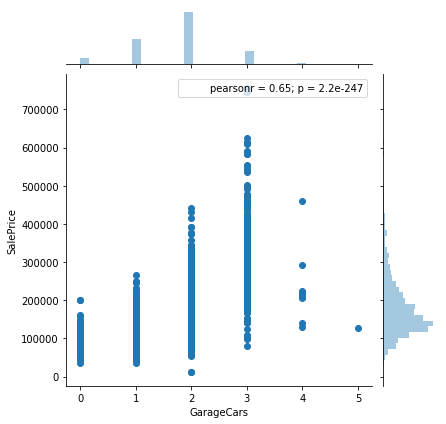

In [72]:
sns.jointplot(train_ames['GarageCars'], train_ames['SalePrice'])

In [73]:
print train_ames.PavedDrive.unique()
print test_ames.PavedDrive.unique()

['Y' 'N' 'P']
['Y' 'N' 'P']


In [74]:
train['PavedDrive'] = train_ames['PavedDrive'].apply(lambda x: 1 if x == 'P' else 2 if x == 'Y' else 0)
test['PavedDrive'] = test_ames['PavedDrive'].apply(lambda x: 1 if x == 'P' else 2 if x == 'Y' else 0)

In [75]:
train['PoolQC'] = train_ames['PoolQC'].apply(lambda x: 10 if x == 'Ex' else 8 if x == 'Gd' else 6 if x == 'TA' else 4 if x == 'Fa' else 2 if x == 'Po' else 0)
test['PoolQC'] = test_ames['PoolQC'].apply(lambda x: 10 if x == 'Ex' else 8 if x == 'Gd' else 6 if x == 'TA' else 4 if x == 'Fa' else 2 if x == 'Po' else 0)

In [76]:
print train_ames.Fence.unique()
print test_ames.Fence.unique()

[nan 'GdPrv' 'GdWo' 'MnPrv' 'MnWw']
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


In [77]:
train['Fence'] = train_ames['Fence'].apply(lambda x: 4 if x == 'GdPrv' else 3 if x == 'MnPrv' else 2 if x == 'GdWo' else 1 if x =='MnWw' else 0)
test['Fence'] = test_ames['Fence'].apply(lambda x: 4 if x == 'GdPrv' else 3 if x == 'MnPrv' else 2 if x == 'GdWo' else 1 if x =='MnWw' else 0)

In [78]:
print train_ames.MiscFeature.unique() # no ['TenC', 'Elev'] in test set
print test_ames.MiscFeature.unique()

[nan 'Shed' 'Othr' 'Gar2' 'TenC' 'Elev']
[nan 'Shed' 'Othr' 'Gar2']


In [79]:
train_misc = pd.get_dummies(train_ames['MiscFeature'], dummy_na=True).drop(columns=['TenC', 'Elev'])
train = train.merge(train_misc, left_index=True, right_index=True)
test_misc = pd.get_dummies(test_ames['MiscFeature'], dummy_na=True)
test = test.merge(test_misc, left_index=True, right_index=True)

In [80]:
print train_ames.SaleType.unique() #1 not in train set ['VWD']
print test_ames.SaleType.unique()

['WD ' 'New' 'ConLD' 'COD' 'CWD' 'ConLI' 'Oth' 'Con' 'ConLw']
['WD ' 'New' 'COD' 'ConLD' 'Con' 'Oth' 'ConLI' 'ConLw' 'CWD' 'VWD']


In [81]:
train_sale = pd.get_dummies(train_ames['SaleType']).drop(columns='Oth')
train = train.merge(train_sale, left_index=True, right_index=True)
test_sale = pd.get_dummies(test_ames['SaleType']).drop(columns=['Oth', 'VWD'])
test = test.merge(test_sale, left_index=True, right_index=True)

In [82]:
print train.shape
print test.shape

(2051, 143)
(879, 143)


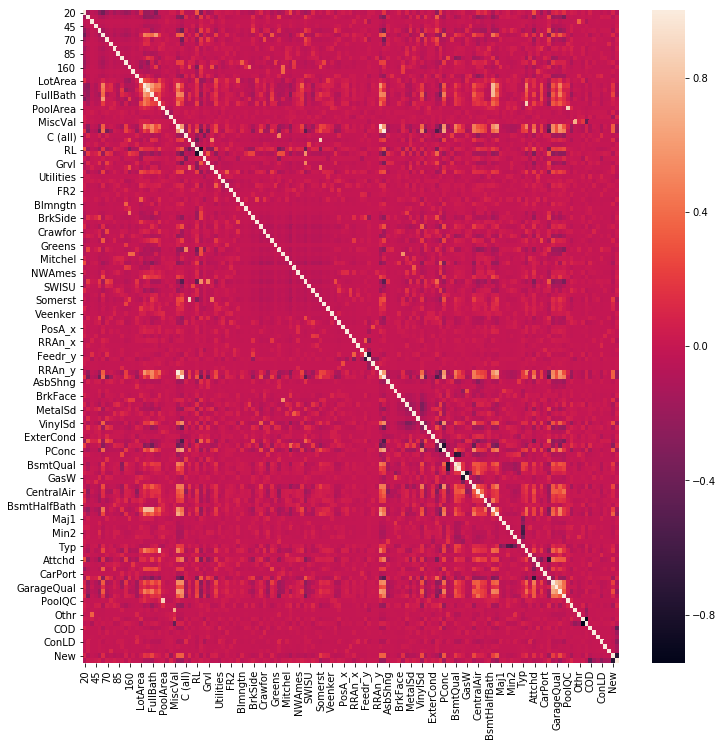

In [91]:
plt.rcParams['figure.figsize'] = (12, 12)
sns.heatmap(train.corr())

In [84]:
# With the Train, Test sets build, I scale them and begin modeling
ss = StandardScaler()
ss.fit(train)
X_train = ss.transform(train)
X_test = ss.transform(test)

In [85]:
en = ElasticNet(max_iter=100000, selection='random')

params = {'alpha': np.linspace(0, 10000, 10**6), 'l1_ratio': np.linspace(0, 1, 10**7)}

rs_en = RandomizedSearchCV(en, params, n_iter=10**5, cv=3, n_jobs=-1, verbose=1)
rs_en.fit(X_train, y_train)
print rs_en.best_score_
print rs_en.best_params_

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 7144 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 9744 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 12744 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 16144 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 19944 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 24144 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 28204 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed: 15.6min finished


0.841581146679933
{'l1_ratio': 0.610266661026666, 'alpha': 0.06000006000006}


In [86]:
las = Lasso(max_iter=100000, selection='random')

params_las = {'alpha': np.linspace(0, 10000, 10**8)}

rs_las = RandomizedSearchCV(las, params_las, n_iter=10**5, cv=3, n_jobs=-1, verbose=1)
rs_las.fit(X_train, y_train)
print rs_las.best_score_
print rs_las.best_params_

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 1431 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1881 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2431 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3081 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3831 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4681 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 5631 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 6681 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 7831 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 9081 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 10431 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 11881 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 13431 tasks      | elapsed: 

0.8444571224814875
{'alpha': 107.33610107336102}


In [87]:
# Final Target, released after
y_test = pd.read_csv('./datasets/withheld/final_target.csv')
y_test.head()

,PID,SalePrice,Usage
0,527105030,195500,Public
1,527127150,213500,Public
2,527163010,175900,Public
3,527216070,538000,Public
4,527258010,394432,Public


In [88]:
y_test = y_test['SalePrice']

In [89]:
rs_en.score(X_test, y_test)

0.8255219240064487

In [90]:
rs_las.score(X_test, y_test)

0.8234998461756111